# Fundamentals of Machine Learning and Word Embeddings {-}
Christine Schmiedler (Chrsch-5@student.ltu.se)

Vachana Javali (vacjav-2@student.ltu.se)

## Part 1 {-}

### Task 1.1 {-}

#### 1.1.1 {-}

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import PIL
from os import listdir
from os.path import isfile, join


imagefilenames = [f for f in listdir("./our_dataset") if isfile(join("./our_dataset", f))]
images = []

for imagename in imagefilenames:
    with PIL.Image.open("./our_dataset/" + imagename) as im:
        im = im.resize((30,30))
        image_array = np.array(im)
        images.append(image_array)
        x, y = image_array.shape[:2]

images = np.array(images)

#### 1.1.2 {-}

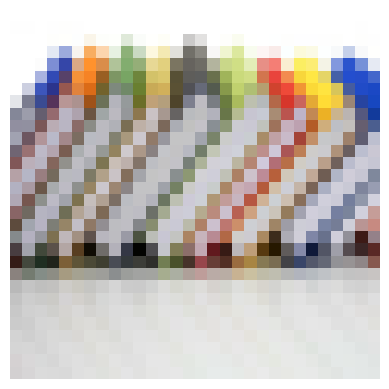

In [ ]:
def PlotSample(index: int, images):
    plt.imshow(images[index])
    plt.axis('off')
    plt.show()

PlotSample(21, images)

### 1.1.3 {-}

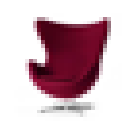

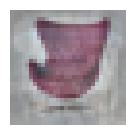

In [ ]:
images_flat = images.reshape(images.shape[0], images.shape[1]*images.shape[2]*images.shape[3])


def plotImage(X):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(30,30,3))
    plt.axis('off')
    plt.show()
    plt.close()


images_norm = images_flat/ 255

images_norm = images_norm - images_norm.mean(axis=0)

cov = np.cov(images_norm, rowvar=False)

U,S,V = np.linalg.svd(cov)

epsilon = 0.1
images_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(images_norm.T).T

images_ZCA_rescaled = (images_ZCA - images_ZCA.min()) / (images_ZCA.max() - images_ZCA.min())

plotImage(images_flat[12, :])
plotImage(images_ZCA_rescaled[12, :])

### Task 1.2 {-}

#### 1.2.1 {-}

In [ ]:
#task 1.2
data = np.load('vecs.npy', allow_pickle=True).item()

vector_list = []
label_list = []
position_list = []
index_list = []

for position in data.keys():
    position_list.append(position)

chosen_position = random.choice(position_list)
print("Chosen position: ", chosen_position)

for digit in data[chosen_position].keys():                 #extract embedding from dictionary                  
    for vector_element in data[chosen_position][digit]:
        vector_list.append(vector_element)
        label_list.append(digit)

print("Total vectors collected: ", len(vector_list)) 
print("Total labels collected: ", len(label_list))

vector_arr = np.vstack(vector_list)
label_arr = np.array(label_list)

def shuffle_arrays(index_list, vector_arr, label_arr):      #shuffle sample and labels in unison
    print("Before shuffle:")          
    print("vector_arr shape: ", vector_arr.shape) 
    print("label_arr shape: ", label_arr.shape)
    print(" First 10 labels: ", label_arr[:10])
    
    index_list = np.arange(len(vector_list))                  
    random.shuffle(index_list)
    
    vector_arr = vector_arr[index_list]
    label_arr = label_arr[index_list]
    
    print("AFTER shuffle:")
    print("vector_arr shape: ", vector_arr.shape) 
    print("label_arr shape: ", label_arr.shape)    
    print("First 10 labels: ", label_arr[:10]) 

shuffle_arrays(index_list, vector_arr, label_arr)

#### **Output**
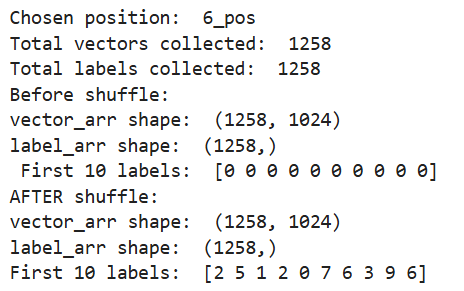

## Part 2 {-}
### Provided Code {-}

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import mnist


(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype()
Tr_set.shape

def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))


2025-11-12 12:49:05.463270: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-12 12:49:05.520969: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-12 12:49:06.679585: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


Accuracy: 0.2649


### Task 2.1 {-}
#### 2.1.1 {-}

The accuracy is __0.2649__

#### 2.1.2 {-}

For L2 the accuracy is __0.19__

In [ ]:
def predict_L2(X, Tr_set, Ltr_set):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sqrt(np.sum(np.square(Tr_set-X[i,:]),axis=1))
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict_L2(Test_images, Tr_set, Ltr_set)

print("Accuracy L2:", np.mean(Labels_predicted==L_test))

Accuracy L2: 0.19


#### 2.2.3 {-}

The problem is that the distance array is of type uint8, which leads to overflowing values and nonsense distances. The fix is to transform it to a float32

With this the accuracy is __0.811__ for L1 and __0.8294__ for L2

In [ ]:
def predict_L1(X, Tr_set, Ltr_set):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)

    X = X.astype(np.float32)
    Tr = Tr_set.astype(np.float32)

    for i in range(num_test):
        distances= np.sum(np.abs(Tr-X[i]),axis=1)

        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

def predict_L2(X, Tr_set, Ltr_set):

    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)

    X = X.astype(np.float32)
    Tr = Tr_set.astype(np.float32)
    
    for i in range(num_test):
        distances=np.sqrt(np.sum(np.square(Tr-X[i]), axis=1))
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]

    return Lpred

Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted_L1=predict_L1(Test_images, Tr_set, Ltr_set)
Labels_predicted_L2=predict_L2(Test_images, Tr_set, Ltr_set)

print("Accuracy L1:", np.mean(Labels_predicted_L1==L_test))
print("Accuracy L2:", np.mean(Labels_predicted_L2==L_test))

Accuracy L1: 0.811
Accuracy L2: 0.8294


#### 2.1.4 {-}

In [ ]:
def majority_vote(array):
    # returns the element found most often in the array. 
    count = np.zeros(array.size)
    for i in range (0, array.size):
        count[i] = np.count_nonzero(array == array[i])
    return array[np.argmax(count)]


def predict_L1(X, k, Tr_set, Ltr_set):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)

    X = X.astype(np.float32)
    Tr = Tr_set.astype(np.float32)
    
    for i in range(num_test):
        distances= np.sum(np.abs(Tr-X[i]),axis=1)

        min_indexes = np.argpartition(distances, k)[:k]
        Lpred[i]= majority_vote(Ltr_set[min_indexes])
    return Lpred

def predict_L2(X, k, Tr_set, Ltr_set):

    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)

    X = X.astype(np.float32)
    Tr = Tr_set.astype(np.float32)
    
    for i in range(num_test):
        distances=np.sqrt(np.sum(np.square(Tr-X[i]), axis=1))
        min_indexes = np.argpartition(distances, k)[:k]
        Lpred[i]= majority_vote(Ltr_set[min_indexes])

    return Lpred

### Task 2.2 {-}
#### 2.2.1 {-} 

The best value of k is __3__.

In [ ]:
def Test_k_values(number_folds):
    # Split data into three parts
    fold_size = int(np.floor(Ltr_set.size / number_folds))
    folds = []
    for i in range (0, number_folds-1): 
        folds.append((Tr_set[i*fold_size:((i+1)*fold_size):1], Ltr_set[i*fold_size:((i+1)*fold_size):1]))
    folds.append((Tr_set[(number_folds-1)*fold_size: Ltr_set.size:1], Ltr_set[(number_folds-1)*fold_size: Ltr_set.size:1]))

    #get accuracy for each k
    average_accuracy = np.zeros(20)
    for k in range (1, 21):
        accuracy_folds = np.zeros(number_folds)

        
    #run training/tests for all the folds and calulate accuracy for each
        for i in range(0,number_folds):
            training_data = np.empty((0, folds[0][0].shape[1]))
            training_data_labels = np.empty((0,))

            
            for j in range(0 ,number_folds):
                if (j == i):
                    test_data = folds[i][0]
                    test_data_labels = folds [i][1]
                else:
                    training_data = np.append(training_data, folds[j][0], axis=0)
                    training_data_labels = np.append(training_data_labels, folds[j][1], axis = 0)

            
            Labels_predicted_L2 = predict_L2(test_data, k, training_data, training_data_labels)
            accuracy_folds[i] = np.mean(Labels_predicted_L2 == test_data_labels)

            
        average_accuracy[k-1] = np.average(accuracy_folds)
    return np.argmax(average_accuracy)+1
            


print("The best value of k is", Test_k_values(3))

The best value of k is 3


#### 2.2.2 {-}

The tested accuracy for k = 3 and L2 is  __0.8189__

In [ ]:
Labels_predicted_L2=predict_L2(Test_images, 3, Tr_set, Ltr_set)
print("Accuracy for k=3 and L2:", np.mean(Labels_predicted_L2==L_test))

Accuracy for k=3 and L2: 0.8189


### Task 3 {-}

In [ ]:
#task 3
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier

iris = datasets.load_iris()                                              # load datset, 150 samples, 4 features, 3 classes
classes = iris.target_names                                              # labels: setosa, versicolor, virginica

def preprocess_data(dataset):                                            #shuffle then split 80:20 for x and y
    index_list = []
    index_list = np.arange(len(dataset.data))                  
    random.shuffle(index_list)
    
    x_arr = dataset.data[index_list, :]
    y_arr = dataset.target[index_list]
    
    split_amount = int(len(dataset.data)*0.8)
    training_data_x = x_arr[:split_amount, :]
    testing_data_x = x_arr[split_amount: , :]
    
    training_data_y = y_arr[:split_amount]
    testing_data_y = y_arr[split_amount:]

    print("DATA SPLITTING")
    print("Training data size: ", len(training_data_x))
    print("Testing data size: ", len(testing_data_y))
    print("\n")
    
    return training_data_x, training_data_y, testing_data_x, testing_data_y

# The classification SVC model
train_x, train_y, test_x, test_y = preprocess_data(iris)
kernel_types = ["linear", "poly", "rbf"]
pred_results_OvO = {}                                                     #store results for OvO and OvR
pred_results_OvR = {}
support_vectors_OvR = {}

def train_model_OvO(kernel_name, train_x, train_y, test_x):    
    model = svm.SVC(kernel=kernel_name)
    clf = model.fit(train_x, train_y)
    pred_y = clf.predict(test_x)
    print("OnevOne STRATEGY")
    return pred_y

def train_model_OvR(kernel_name, train_x, train_y, test_x):
    support_vectors = {}
    model = OneVsRestClassifier(SVC(kernel=kernel_name))    
    clf = model.fit(train_x, train_y)

    print("OnevRest STRATEGY")
    
    i = 0
    for estimators in model.estimators_:                                   #extract support vectors for OvR
        class_name = classes[i]
        support_vectors[class_name] = estimators.support_vectors_
        i = i + 1

    pred_y = clf.predict(test_x)
    return pred_y, support_vectors

def evaluate(test_y, pred_y, kernel_name):                                 #evaluate performance
    true_y = test_y 
    accuracy = metrics.accuracy_score(test_y, pred_y)
    confusion_matrix = metrics.confusion_matrix(test_y, pred_y)
    f1_score = metrics.f1_score(test_y, pred_y, average="macro")

    print("Confusion matrix for kernel "+ kernel_name+": \n", confusion_matrix)
    print("Accuracy: ", accuracy)
    print("F1 score: ", f1_score)
    print("\n")

for kernel_name in kernel_types:                                           #train model with different strategies and kernels
    pred_y_OvO = train_model_OvO(kernel_name, train_x, train_y, test_x)    
    evaluate(test_y, pred_y_OvO, kernel_name)
    pred_results_OvO[kernel_name] = pred_y_OvO

    pred_y_OvR, support_vectors = train_model_OvR(kernel_name, train_x, train_y, test_x)
    support_vectors_OvR[kernel_name] = support_vectors 
    print("Extracted support vectors contained in support_vectors_OvR")
    evaluate(test_y, pred_y_OvR, kernel_name)
    pred_results_OvR[kernel_name] = pred_y_OvR
    
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
    
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_decision_boundary(feature_names, X, y):
    for kernel_name in kernel_types:                                          #plot decision boundary for different kernels (no preprocessing)
        model = svm.SVC(kernel=kernel_name)
        clf = model.fit(X, y)
        
        fig, ax = plt.subplots()
        # title for the plots
        title = ('Decision surface of '+kernel_name+' SVC ')
        # Set-up grid for plotting.
        X0, X1 = X[:, 0], X[:, 1]
        xx, yy = make_meshgrid(X0, X1)
        plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
        ax.set_ylabel("{}".format(feature_names[0]))
        ax.set_xlabel("{}".format(feature_names[1]))
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
        plt.show()

feature_names = iris.feature_names[1:3]                                      #features 2v3
X = iris.data[:, 1:3] 
y = iris.target
plot_decision_boundary(feature_names, X, y)

feature_names = iris.feature_names[2:4]                                      #features 3v4
X = iris.data[:, 2:4] 
plot_decision_boundary(feature_names, X, y)

### 3.1.1
#### **OnevOne STRATEGY**

Confusion matrix for kernel linear: 
```python
 [[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]
```
Accuracy:  1.0

F1 score:  1.0

Confusion matrix for kernel poly: 
```python
 [[11  0  0]
 [ 0 10  0]
 [ 0  1  8]]
```
Accuracy:  0.9666666666666667

F1 score:  0.9645191409897292

Confusion matrix for kernel rbf: 
```python
 [[11  0  0]
 [ 0 10  0]
 [ 0  1  8]]
```
Accuracy:  0.9666666666666667

F1 score:  0.9645191409897292

#### **OnevRest STRATEGY**
Confusion matrix for kernel linear: 
```python
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
```
Accuracy:  0.9333333333333333

F1 score:  0.9296296296296296

Confusion matrix for kernel poly: 
```python
 [[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]
```
Accuracy:  1.0

F1 score:  1.0

Confusion matrix for kernel rbf: 
```python
 [[11  0  0]
 [ 0 10  0]
 [ 0  2  7]]
```
Accuracy:  0.9333333333333333

F1 score:  0.9280303030303031



### 3.1.2
Best kernel for OnevOne with highest accuracy is: **Linear**

Best kernel for OnevRest with highest accuracy is: **Poly**

### 3.1.3
The support vectors are stored in the dictionary **support_vectors_OvR**

### 3.1.4
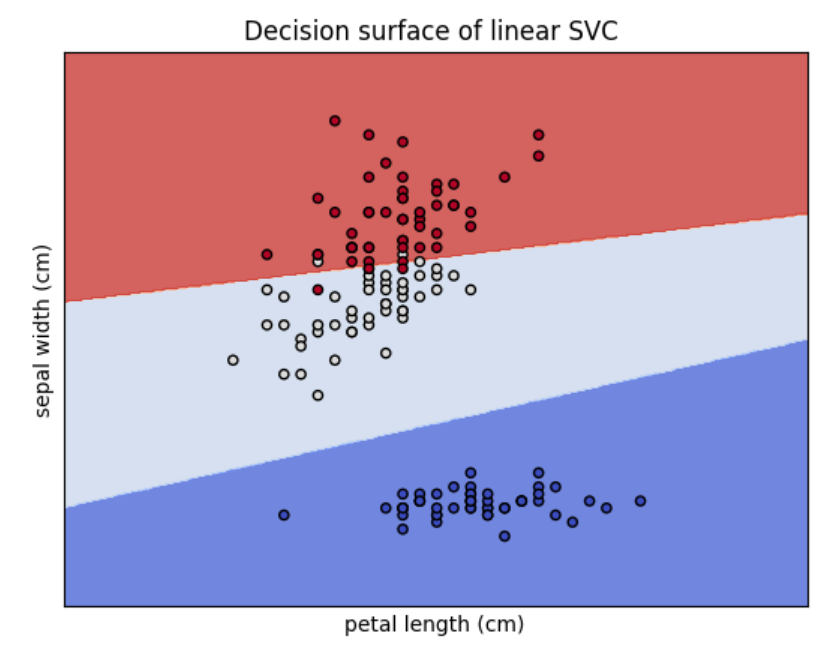
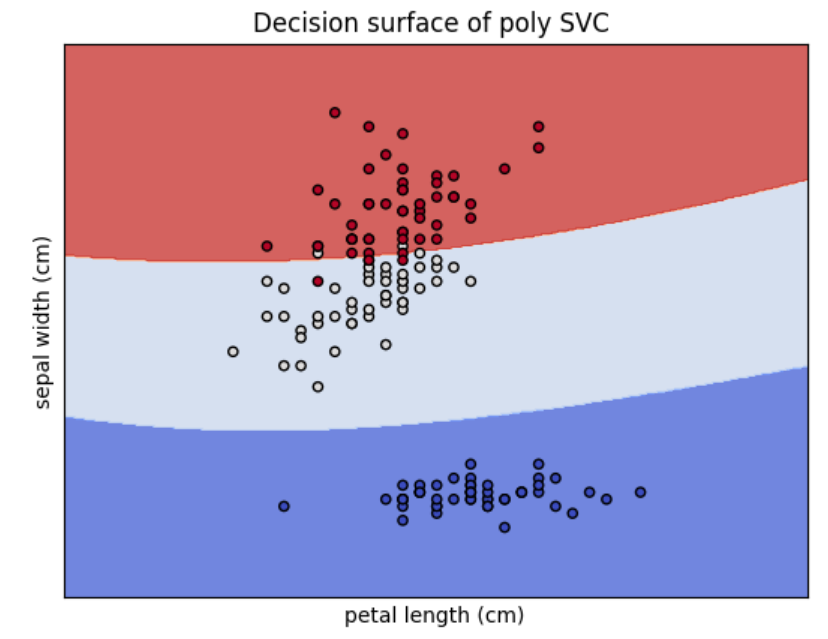
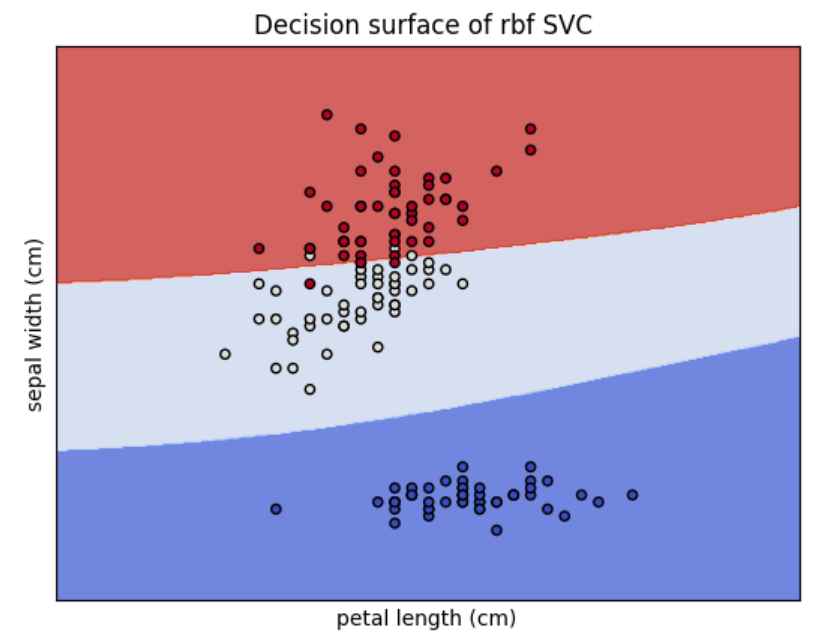
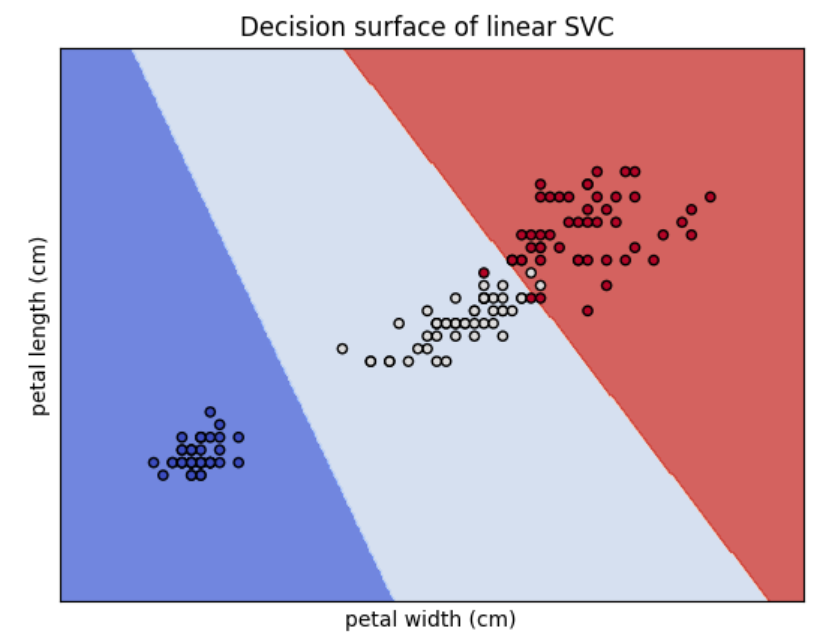
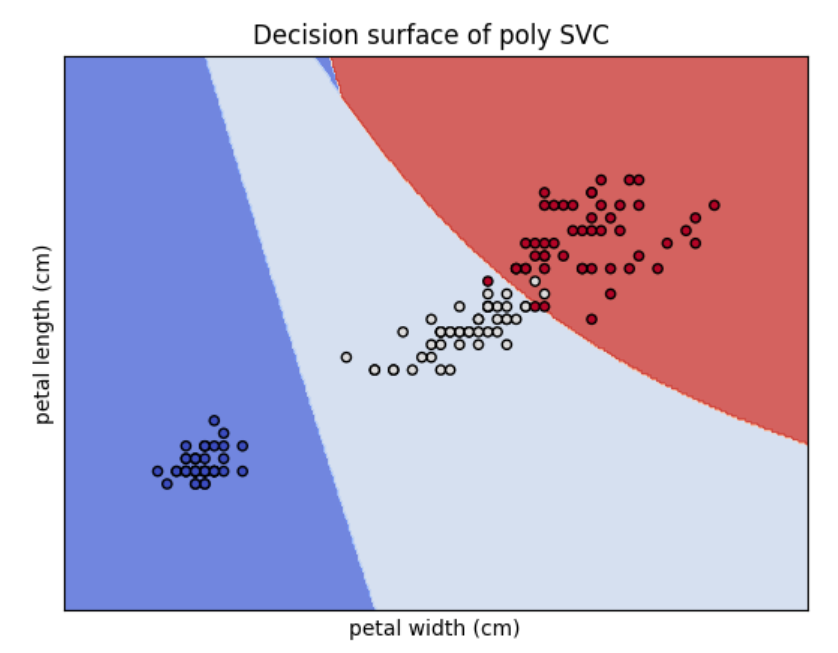
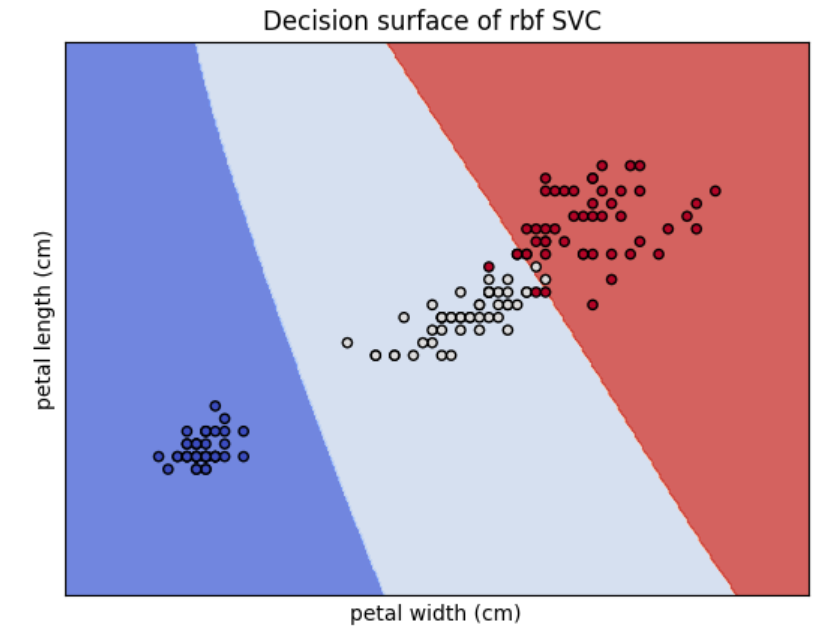

### Task 4 {-}

#### 4.1 {-}

| Dimentions | Run 1 | Run 2 | Run 3 | Run 4 | Run 5 | Average| Improvement | 
|------------|-------|-------|-------|-------|-------|-------|-------|
| 10         |47.5%|47.5%|46.25%|48.75%|45.0%|47%| | |
| 50       |     66.25%  |   63.75%    |  63.75%     |    61.25%    |    63.75%   | 63.75%|16,75% |
| 100      |    68.75%   |    67.5%   | 67.5%      |    66.25%   |   68.75%    |67.75%|4%|

While one can see that the Accuracy increases by a lot when the dimentions change from 10 to 50, the change from 50 to 100 is not nearly as big. There is still improvement, but it is very small in comparison to the first jump. Thus it is reasonable to assume that though improving the dimentionality also improves accuracy, the returns are deminishing, especially since the computational cost increases linearly. An effect that was not seen here, but still has to be considered is that a dimentionality that is too high, can lead to overfitting, which would hurt the accuracy.

#### 4.2 {-}

The code works fine for window_size = 2 because it’s set up to look at fixed neighboring lines like lines[1], lines[3], and lines[4]. If the window size gets bigger, these hardcoded references don’t cover all the extra neighbors. It is tuned for a small window and doesn’t generalize easily. The easiest way to fix this is to flatten lines from a list of lists to a normal list, that contains all words, and does not differentiate bewteen lines. With that most of the case handeling for end/beginning of the line words would disappear.

| Dimentions | Run 1 | Run 2 | Run 3 | Run 4 | Run 5 | Average| Improvement | 
|------------|-------|-------|-------|-------|-------|-------|-------|
| 1000         |73.75%| 72.5%|66.25%|70.0% |68.75%|70.25% ||
| 2000      |75.0%| 70.0%|73.75%| 72.5%|67.5%| 71.75% | 1%|
| 4000     |73.75%|72.5%|70.0%|71.25% |68.75%| 71.25%|-0.5%| 

The accuracy remains roughly the same across all tested dimensions. This is not uncommon for Random Indexing as the most essantial information is captured by lower dimentional vectors and adding more dimentions doesn't add any new information.

#### Conclusion {-}
In terms of accuracy the Random Indexing performed better in this test. That said it did not increase for higher dimentions, so with the current level of testing it is unclear if the Word2Vec would have outperformed it with more dimentions. For 100 dimentions for Word2Vec the accuracy was fairly similiar to Random indexing, though still smaller.
During our testing RI had shorter runtimes and a higher accuracy. Do for this specific case RI would be the superior choice.